📈 Titanic Survival Prediction 📉 @Keerati-Deja 

Logistic Regression - Machine Learning

⚠️Achtung!⚠️\
Data Preprocessing's miscellaneous details in the titanic_analytics.ipynb

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [24]:
df = pd.read_csv('titanic_dataset_clean.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


<Axes: >

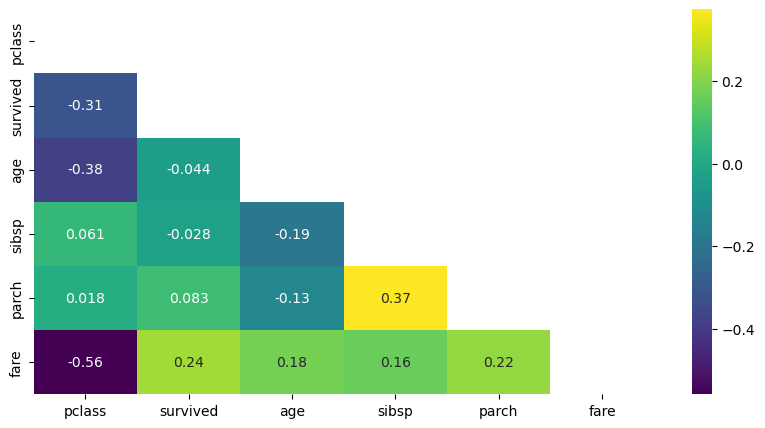

In [25]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))
sns.heatmap(df.corr(numeric_only = True), cbar = True, annot = True, cmap="viridis", mask = mask)

In [26]:
df_copy = df.copy()

In [ ]:
# Feature Engineering

#Plot pairwise
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

df_copy['name'] = labelencoder_X.fit_transform(df_copy['name'])
df_copy['embarked'] = labelencoder_X.fit_transform(df_copy['embarked'])
df_copy['ticket'] = df_copy['ticket'].astype(str)
df_copy['ticket'] = labelencoder_X.fit_transform(df_copy['ticket'])

In [ ]:
df_copy.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Split Sex column into two seperated columns (Male, Female)
result = OneHotEncoder().fit_transform(df_copy['sex'].values.reshape(-1, 1)).toarray()
df_copy[['Female', 'Male']] = pd.DataFrame(result, index = df_copy.index)

# Delete the previous Sex column
df_copy.drop(['sex'], axis=1, inplace=True)

df_copy.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = df_copy.drop('survived', axis=1)
y = df_copy['survived']

# Train 70% Test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
p_predict = model.predict(X_test)

print('The accuracy is', round(accuracy_score(p_predict, y_test) * 100,2))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
fx.set_title('Confusion matrix\n\n')
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ')
plt.show()

print(f'Classification Report\n{classificationReport}')

In [ ]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, p_predict)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()